            SPX Index   RF      AAPL      MSFT      NVDA         V        MA  \
Date                                                                           
2014-01-03  -0.000333  0.0 -0.021942 -0.006726 -0.011765  0.000679 -0.003995   
2014-01-06  -0.002512  0.0  0.005446 -0.021135  0.013258 -0.006014 -0.004963   
2014-01-07   0.006082  0.0 -0.007182  0.007753  0.016288  0.007642  0.013929   
2014-01-08  -0.000212  0.0  0.006345 -0.017854  0.013663  0.003206 -0.000293   
2014-01-09   0.000348  0.0 -0.012728 -0.006433 -0.037325 -0.001396  0.008082   

               GOOGL      META      NFLX  ...       BAC       WFC         C  \
Date                                      ...                                 
2014-01-03 -0.007296 -0.002802  0.000772  ...  0.019247  0.007108  0.021620   
2014-01-06  0.011151  0.048453 -0.009716  ...  0.015239  0.001764  0.007676   
2014-01-07  0.019264  0.012578 -0.055814  ... -0.009602 -0.000441  0.006876   
2014-01-08  0.002108  0.005363  0.004392  ..

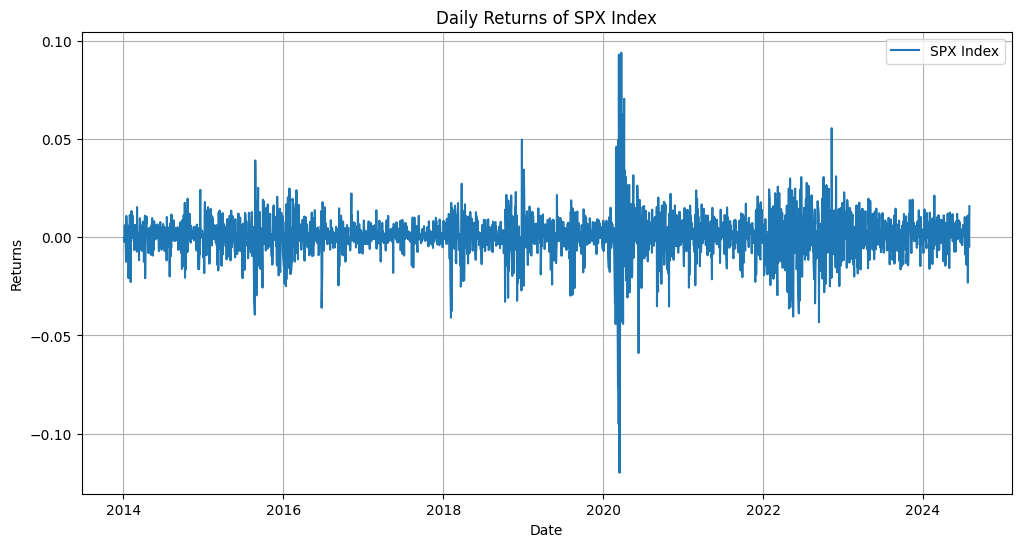

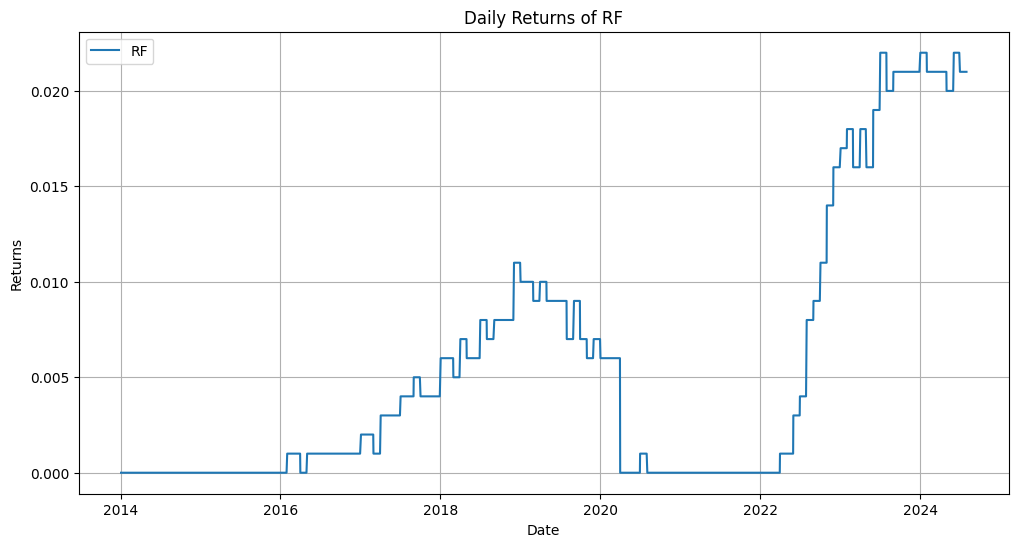

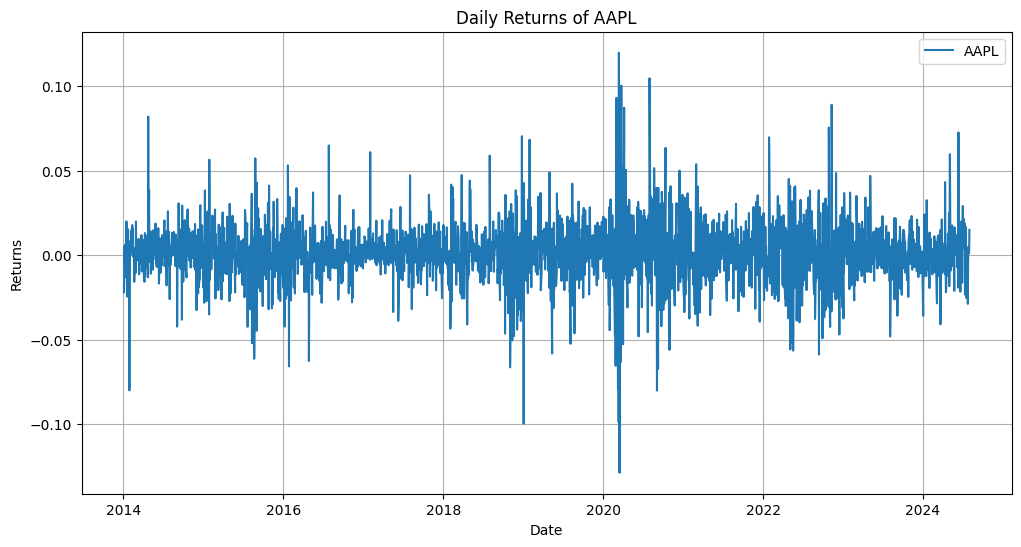

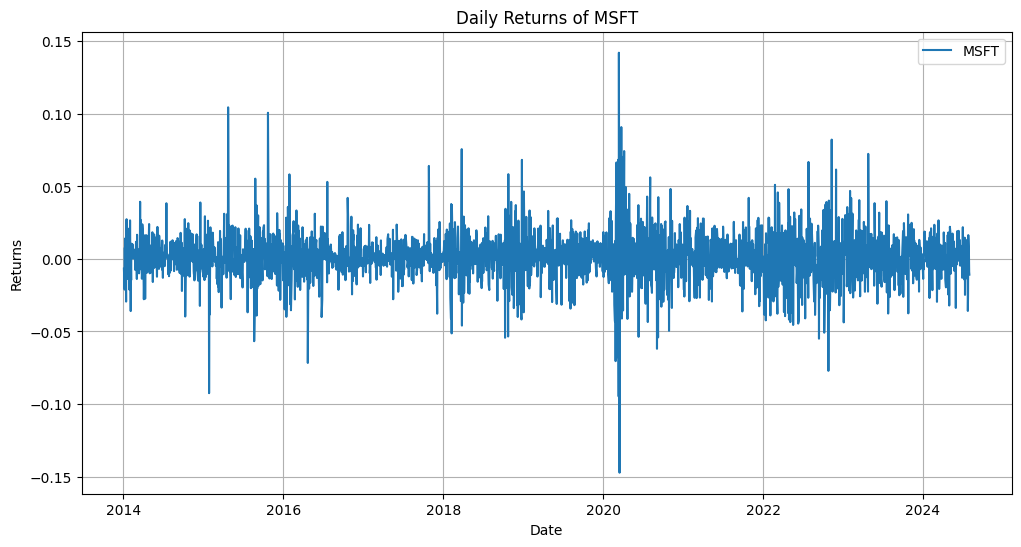

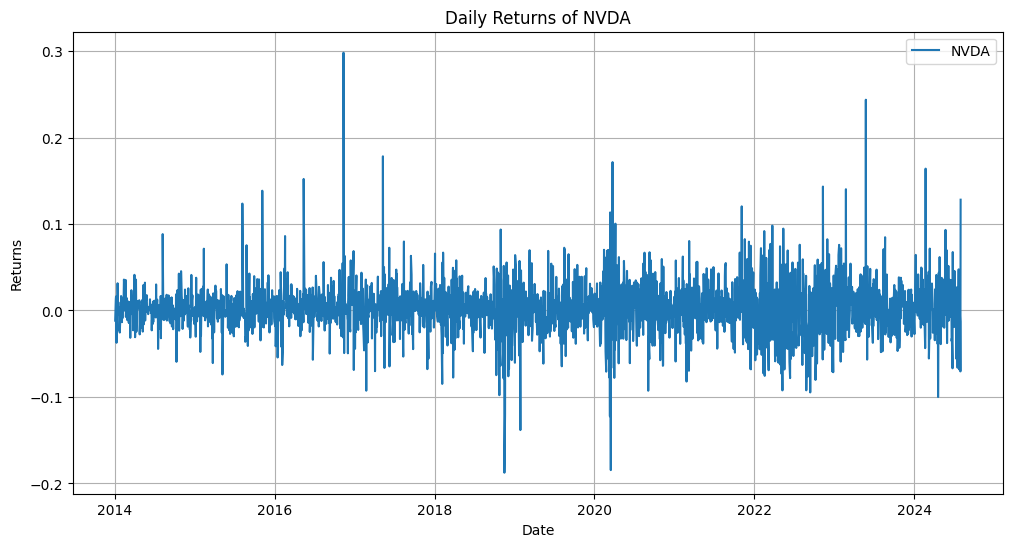

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest
import numpy as np

# 1. Data Import and Reading
df = pd.read_excel('Returns.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# View the raw data
print(df.head())  # Show the first few rows of the data
print(df.describe())  # Summary statistics of the data

# Plotting the returns of the first few assets to visualize their trends over time
assets = df.iloc[:, :5].columns  # Get the names of the first five assets

# Plot each asset's returns separately
for asset in assets:
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[asset], label=asset)
    plt.title(f'Daily Returns of {asset}')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

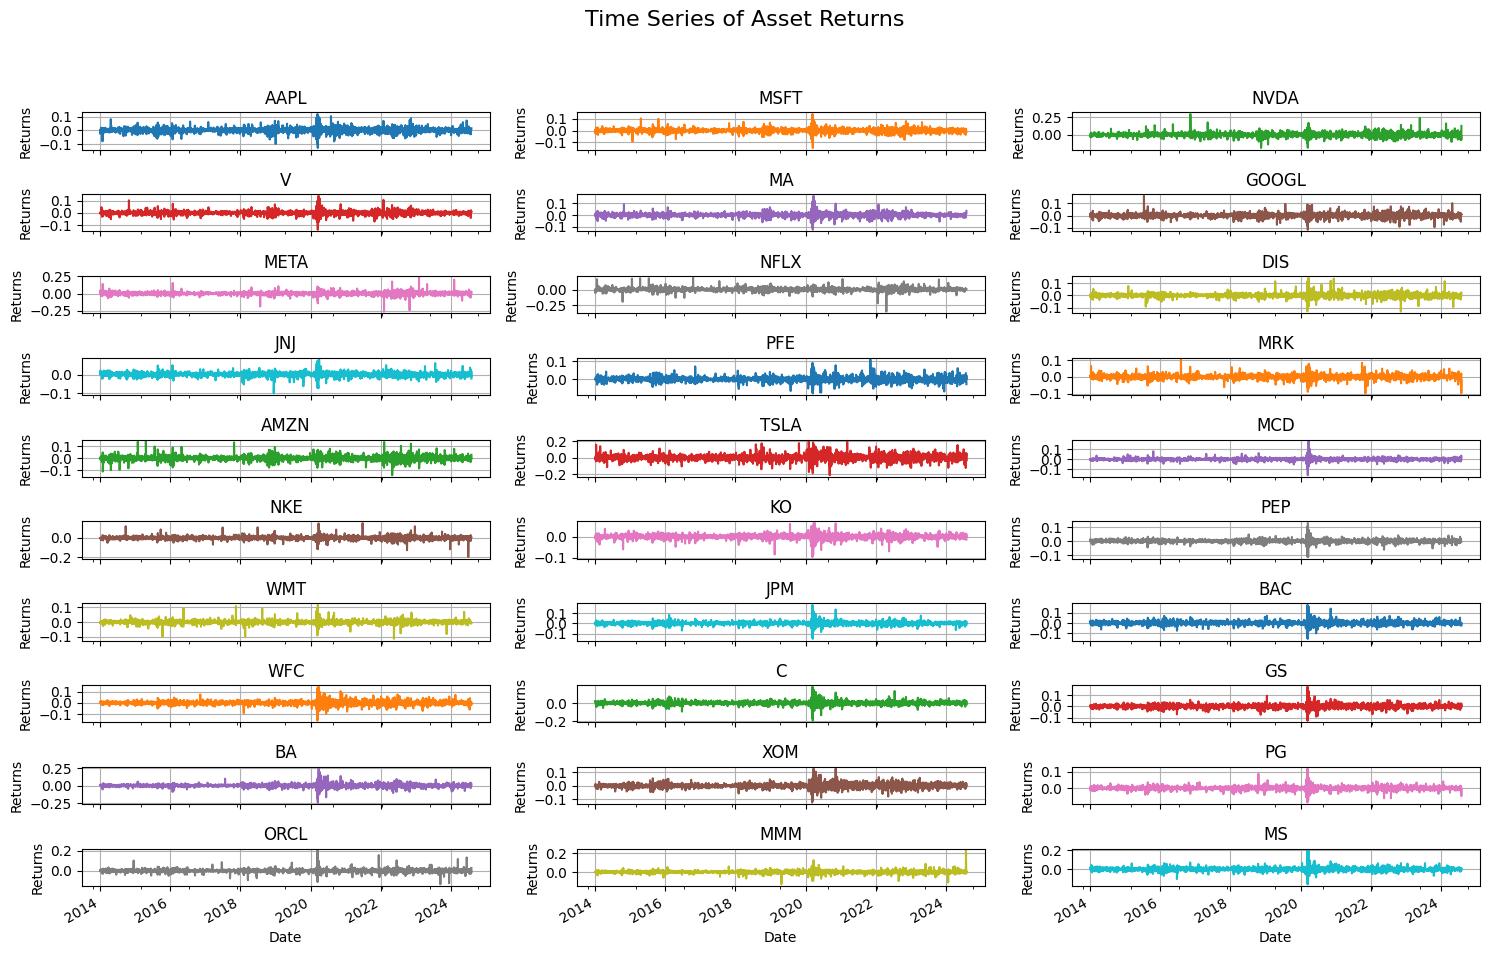

In [2]:
# 2. Praparing the data
colunas_ativos = df.columns[2:]  # IgnorIgnoring 'SPX Index' e 'RF'

df['RF'] = pd.to_numeric(df['RF'], errors='coerce')
df['SPX Index'] = pd.to_numeric(df['SPX Index'], errors='coerce')
df[colunas_ativos] = df[colunas_ativos].apply(pd.to_numeric, errors='coerce') # Convert column types to numeric

ax = df[colunas_ativos].plot(subplots=True, figsize=(15, 10), layout=(len(colunas_ativos)//3, 3), title='Time Series of Asset Returns', legend=False)
plt.suptitle('Time Series of Asset Returns', fontsize=16)  # Main title for all subplots

# Adjust individual subplot titles and axis
for i, axis in enumerate(ax.flatten()):
    axis.set_title(colunas_ativos[i])  # Set title as the asset's name
    axis.set_ylabel('Returns')         # Set y-axis label
    axis.grid(True)                    # Add gridlines for better readability

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit titles and labels without overlapping
plt.show()

In [4]:
colunas_ativos = df.columns[2:]  # Ignoring 'SPX Index' and 'RF'

# Convert the annual risk-free rate to a daily rate
df['RF_diaria'] = (1 + df['RF']) ** (1/252) - 1

# Calculate excess returns for assets and the market
retornos_excesso_acoes = df[colunas_ativos].subtract(df['RF_diaria'], axis=0)
retorno_excesso_mercado = df['SPX Index'] - df['RF_diaria']

# Remove missing values
retornos_excesso_acoes = retornos_excesso_acoes.dropna()
retorno_excesso_mercado = retorno_excesso_mercado.dropna()

# Align dates between assets and market returns
datas_comuns = retornos_excesso_acoes.index.intersection(retorno_excesso_mercado.index)
retornos_excesso_acoes = retornos_excesso_acoes.loc[datas_comuns]
retorno_excesso_mercado = retorno_excesso_mercado.loc[datas_comuns]

# Verify the alignment and completeness of the data
print("Excess Returns for Assets:\n", retornos_excesso_acoes.head())
print("Excess Returns for Market:\n", retorno_excesso_mercado.head())

Excess Returns for Assets:
                 AAPL      MSFT      NVDA         V        MA     GOOGL  \
Date                                                                     
2014-01-03 -0.021942 -0.006726 -0.011765  0.000679 -0.003995 -0.007296   
2014-01-06  0.005446 -0.021135  0.013258 -0.006014 -0.004963  0.011151   
2014-01-07 -0.007182  0.007753  0.016288  0.007642  0.013929  0.019264   
2014-01-08  0.006345 -0.017854  0.013663  0.003206 -0.000293  0.002108   
2014-01-09 -0.012728 -0.006433 -0.037325 -0.001396  0.008082 -0.009640   

                META      NFLX       DIS       JNJ  ...       BAC       WFC  \
Date                                                ...                       
2014-01-03 -0.002802  0.000772 -0.002098  0.009008  ...  0.019247  0.007108   
2014-01-06  0.048453 -0.009716 -0.003810  0.005226  ...  0.015239  0.001764   
2014-01-07  0.012578 -0.055814  0.006858  0.021228  ... -0.009602 -0.000441   
2014-01-08  0.005363  0.004392 -0.014671 -0.001379  ...  0

Keys in modelo.params for AAPL: Index(['const', 'Excesso_Mercado'], dtype='object')
Keys in modelo.pvalues for AAPL: Index(['const', 'Excesso_Mercado'], dtype='object')
Keys in modelo.params for MSFT: Index(['const', 'Excesso_Mercado'], dtype='object')
Keys in modelo.pvalues for MSFT: Index(['const', 'Excesso_Mercado'], dtype='object')
Keys in modelo.params for NVDA: Index(['const', 'Excesso_Mercado'], dtype='object')
Keys in modelo.pvalues for NVDA: Index(['const', 'Excesso_Mercado'], dtype='object')
Keys in modelo.params for V: Index(['const', 'Excesso_Mercado'], dtype='object')
Keys in modelo.pvalues for V: Index(['const', 'Excesso_Mercado'], dtype='object')
Keys in modelo.params for MA: Index(['const', 'Excesso_Mercado'], dtype='object')
Keys in modelo.pvalues for MA: Index(['const', 'Excesso_Mercado'], dtype='object')
Keys in modelo.params for GOOGL: Index(['const', 'Excesso_Mercado'], dtype='object')
Keys in modelo.pvalues for GOOGL: Index(['const', 'Excesso_Mercado'], dtype='obj

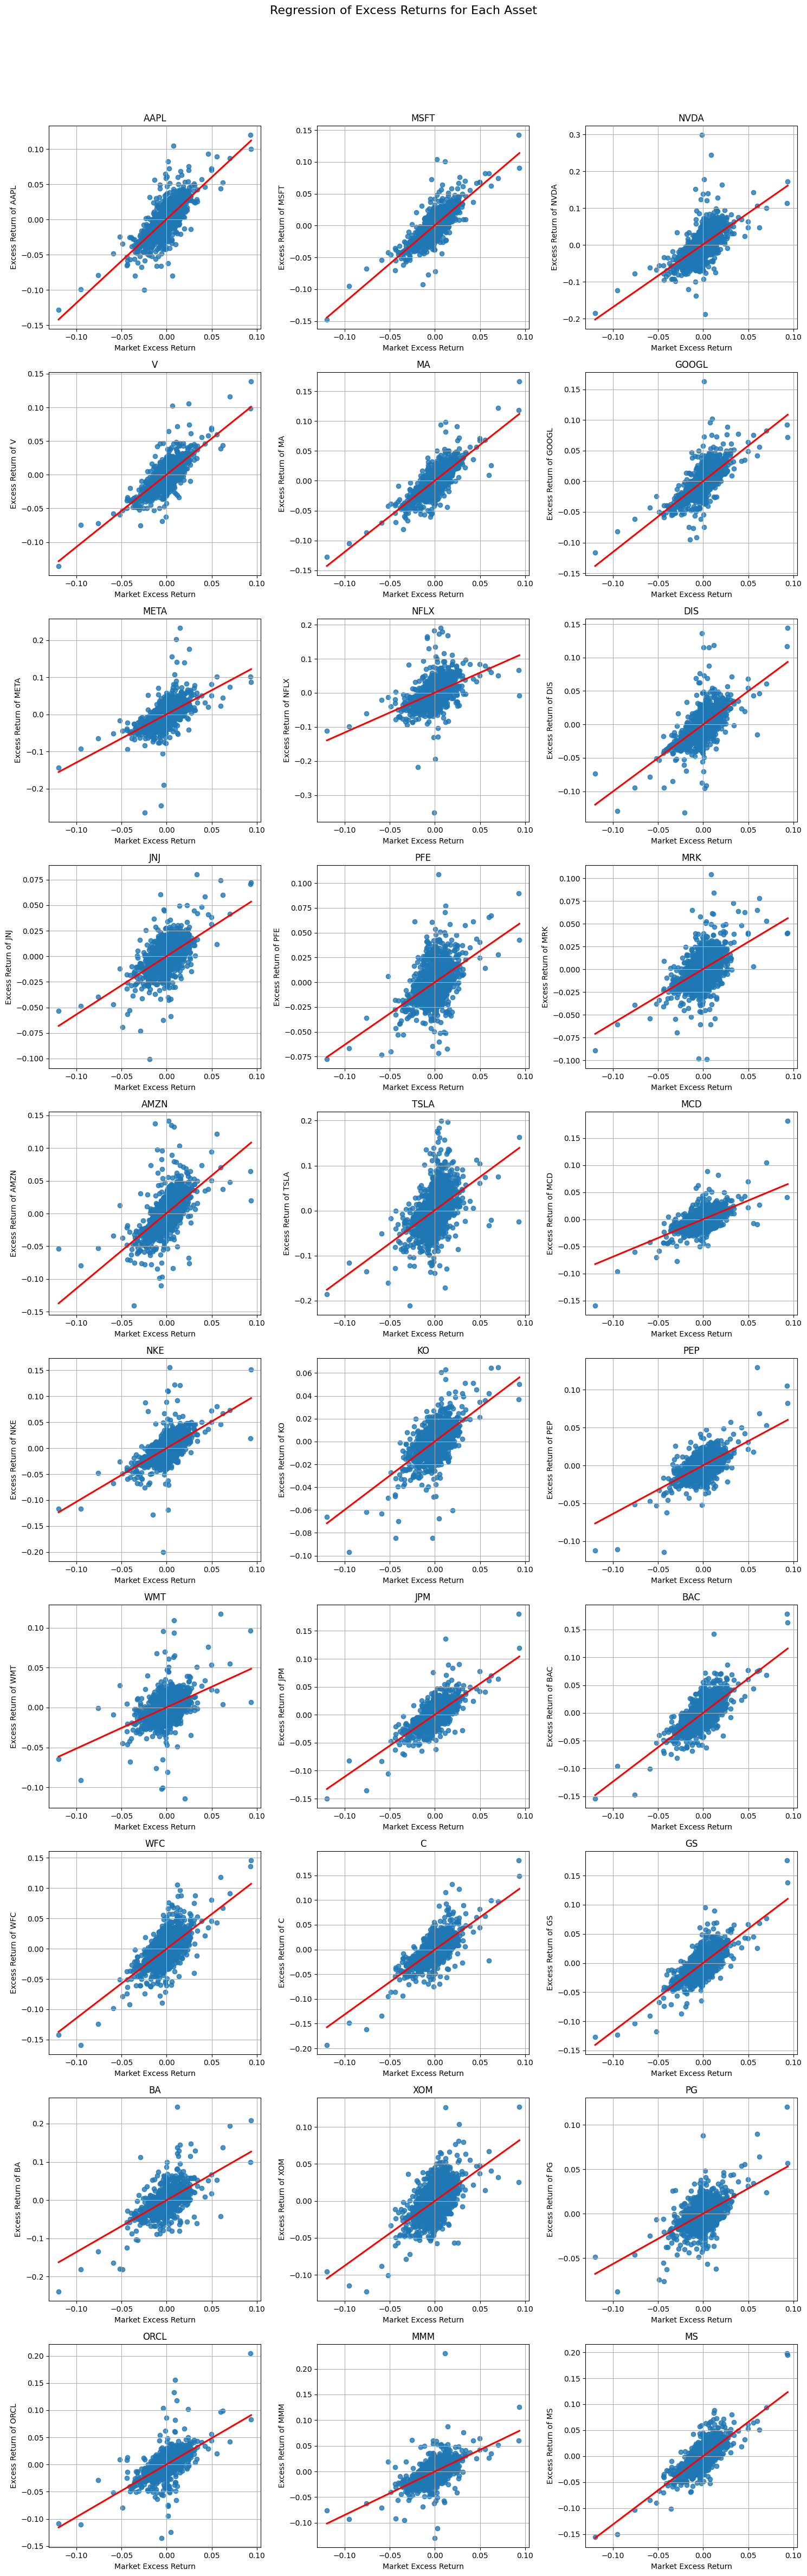

    Ativo     Alpha      Beta  R_quadrado   P_alpha         P_beta
0    AAPL  0.000557  1.188607    0.541342  0.017081   0.000000e+00
1    MSFT  0.000548  1.209153    0.623277  0.006355   0.000000e+00
2    NVDA  0.001801  1.698935    0.398729  0.000053  4.603212e-296
3       V  0.000227  1.073372    0.591962  0.233364   0.000000e+00
4      MA  0.000249  1.192276    0.601493  0.228356   0.000000e+00
5   GOOGL  0.000292  1.154426    0.520790  0.215644   0.000000e+00
6    META  0.000488  1.296889    0.360448  0.185804  2.104349e-260
7    NFLX  0.000775  1.170813    0.215680  0.103941  1.782856e-142
8     DIS -0.000217  0.998762    0.409447  0.397327  1.872070e-306
9     JNJ  0.000099  0.568795    0.307125  0.586894  3.944741e-214
10    PFE -0.000029  0.629376    0.234085  0.905274  3.332494e-156
11    MRK  0.000249  0.594728    0.233166  0.278769  1.643180e-155
12   AMZN  0.000511  1.149718    0.374514  0.106651  2.977253e-273
13   TSLA  0.001106  1.475294    0.212872  0.067521  2.076285e

In [5]:
# 4. Estimation of Betas for Each Asset
resultados_regressao_list = []  # Initialize an empty list to collect DataFrames

# Determine the number of rows and columns for the subplots grid
n_assets = len(colunas_ativos)
n_cols = 3  # Number of columns in the grid
n_rows = (n_assets + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create a figure with subplots
plt.figure(figsize=(15, 5 * n_rows))
plt.suptitle('Regression of Excess Returns for Each Asset', fontsize=16)  # Main title

for i, ativo in enumerate(colunas_ativos):
    X = retorno_excesso_mercado
    y = retornos_excesso_acoes[ativo]

    # Ensure the name of retorno_excesso_mercado is set correctly
    if retorno_excesso_mercado.name is None or retorno_excesso_mercado.name != 'Excesso_Mercado':
        retorno_excesso_mercado.name = 'Excesso_Mercado'

    # Ensure there are no missing values
    if X.isnull().any() or y.isnull().any():
        print(f"Missing data detected for {ativo}. Skipping.")
        continue  # Skip the current loop if there's missing data

    # Add a constant (intercept) to the model
    X = sm.add_constant(X)

    try:
        # Fit the OLS regression model
        modelo = sm.OLS(y, X).fit()

        # Debug: Print available keys to understand the structure
        print(f"Keys in modelo.params for {ativo}: {modelo.params.keys()}")
        print(f"Keys in modelo.pvalues for {ativo}: {modelo.pvalues.keys()}")

        # Check if 'const' and 'Excesso_Mercado' are present
        if 'const' not in modelo.params or 'Excesso_Mercado' not in modelo.params:
            print(f"Expected keys not found in the regression results for {ativo}. Skipping.")
            continue

        # Create a DataFrame for each regression result
        result = pd.DataFrame({
            'Ativo': [ativo],
            'Alpha': [modelo.params['const']],
            'Beta': [modelo.params['Excesso_Mercado']],
            'R_quadrado': [modelo.rsquared],
            'P_alpha': [modelo.pvalues['const']],
            'P_beta': [modelo.pvalues['Excesso_Mercado']]
        })

        # Append the DataFrame to the list
        resultados_regressao_list.append(result)

        # Visualization: Scatter plot with regression line
        plt.subplot(n_rows, n_cols, i + 1)  # Position in the grid
        sns.regplot(x=X['Excesso_Mercado'], y=y, line_kws={"color": "red"}, ci=None)
        plt.title(f'{ativo}')
        plt.xlabel('Market Excess Return')
        plt.ylabel(f'Excess Return of {ativo}')
        plt.grid(True)

    except KeyError as e:
        print(f"KeyError: {e} for asset {ativo}. Please check the data or model fitting process.")
    except Exception as e:
        print(f"An unexpected error occurred for asset {ativo}: {e}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the plots and titles
plt.show()

# Concatenate all DataFrames in the list into a single DataFrame
if resultados_regressao_list:
    resultados_regressao = pd.concat(resultados_regressao_list, ignore_index=True)
    # Display the consolidated regression results
    print(resultados_regressao)
else:
    print("No regression results to display.")

In [8]:
# Round the numeric columns to 4 decimal places for better readability
resultados_regressao = resultados_regressao.round({
    'Alpha': 4,
    'Beta': 4,
    'R_quadrado': 4,
    'P_alpha': 4,
    'P_beta': 4
})

# Use pandas styling to make it prettier
styled_df = resultados_regressao.style.format({
    'Alpha': '{:.4f}',
    'Beta': '{:.4f}',
    'R_quadrado': '{:.4f}',
    'P_alpha': '{:.4f}',
    'P_beta': '{:.4f}'
}).set_caption('Regression Results for Each Asset') \
  .set_table_styles({
      'Ativo': [{'selector': 'th', 'props': 'font-weight: bold; text-align: center;'}],
      'Alpha': [{'selector': 'th', 'props': 'font-weight: bold; text-align: center;'}],
      'Beta': [{'selector': 'th', 'props': 'font-weight: bold; text-align: center;'}],
      'R_quadrado': [{'selector': 'th', 'props': 'font-weight: bold; text-align: center;'}],
      'P_alpha': [{'selector': 'th', 'props': 'font-weight: bold; text-align: center;'}],
      'P_beta': [{'selector': 'th', 'props': 'font-weight: bold; text-align: center;'}],
  })

# Display the styled DataFrame
styled_df

,Ativo,Alpha,Beta,R_quadrado,P_alpha,P_beta
0,AAPL,0.0006,1.1886,0.5413,0.0171,0.0000
1,MSFT,0.0005,1.2092,0.6233,0.0064,0.0000
2,NVDA,0.0018,1.6989,0.3987,0.0001,0.0000
3,V,0.0002,1.0734,0.5920,0.2334,0.0000
4,MA,0.0002,1.1923,0.6015,0.2284,0.0000
5,GOOGL,0.0003,1.1544,0.5208,0.2156,0.0000
6,META,0.0005,1.2969,0.3604,0.1858,0.0000
7,NFLX,0.0008,1.1708,0.2157,0.1039,0.0000
8,DIS,-0.0002,0.9988,0.4094,0.3973,0.0000
9,JNJ,0.0001,0.5688,0.3071,0.5869,0.0000


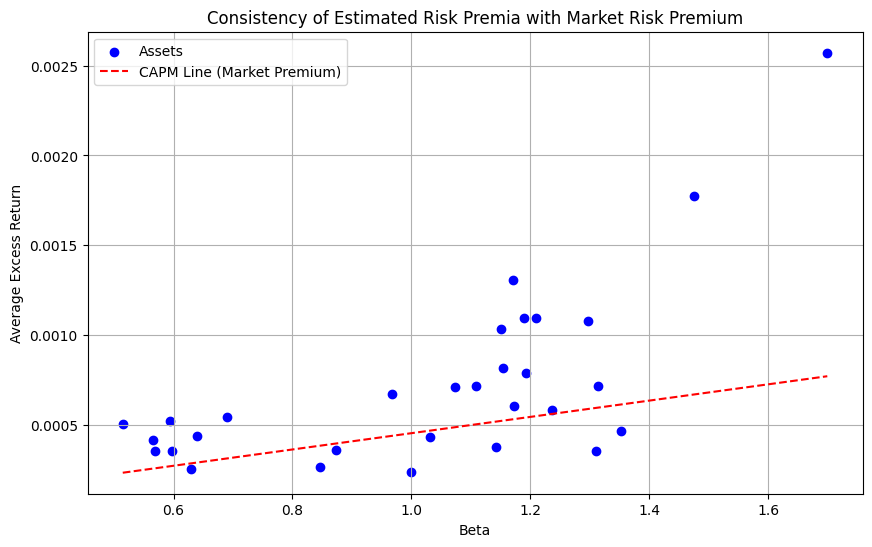

In [9]:
average_market_premium = retorno_excesso_mercado.mean()
asset_betas = resultados_regressao['Beta']
asset_excess_returns = retornos_excesso_acoes.mean()  # Average excess returns of each asset

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(asset_betas, asset_excess_returns, color='blue', label='Assets')

# Plot the CAPM line
x = np.linspace(min(asset_betas), max(asset_betas), 100)
y = average_market_premium * x
plt.plot(x, y, color='red', linestyle='--', label='CAPM Line (Market Premium)')

plt.xlabel('Beta')
plt.ylabel('Average Excess Return')
plt.title('Consistency of Estimated Risk Premia with Market Risk Premium')
plt.legend()
plt.grid(True)
plt.show()

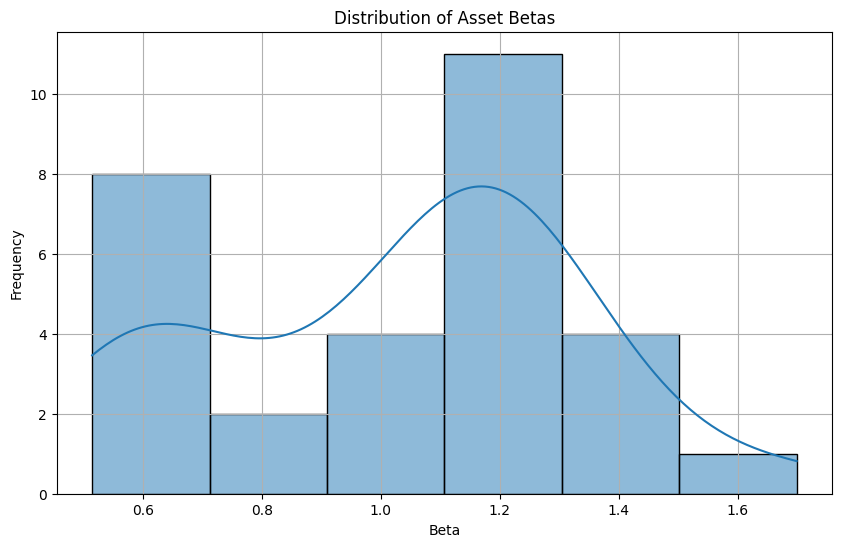

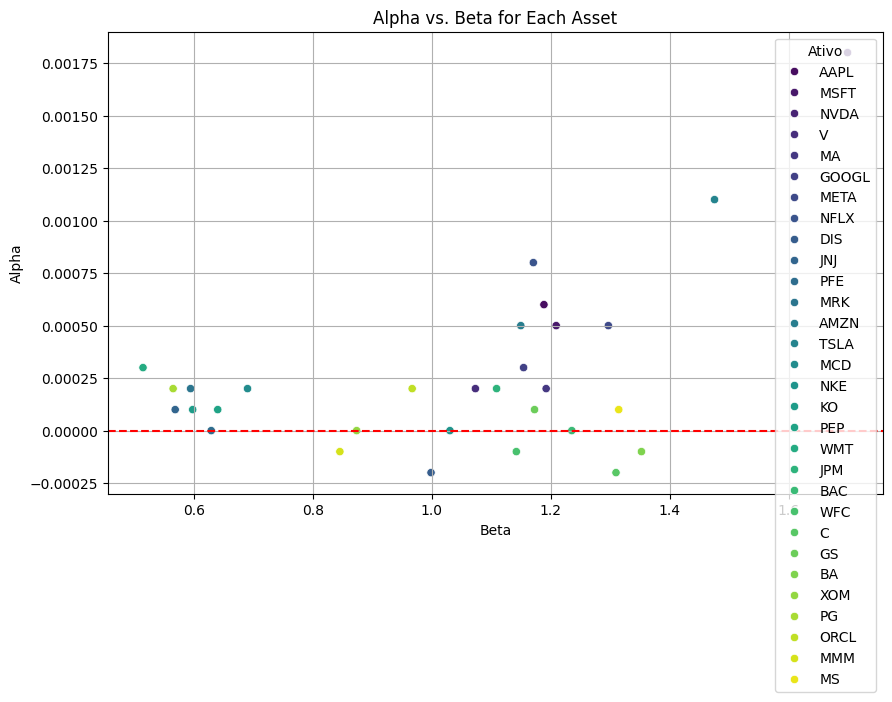

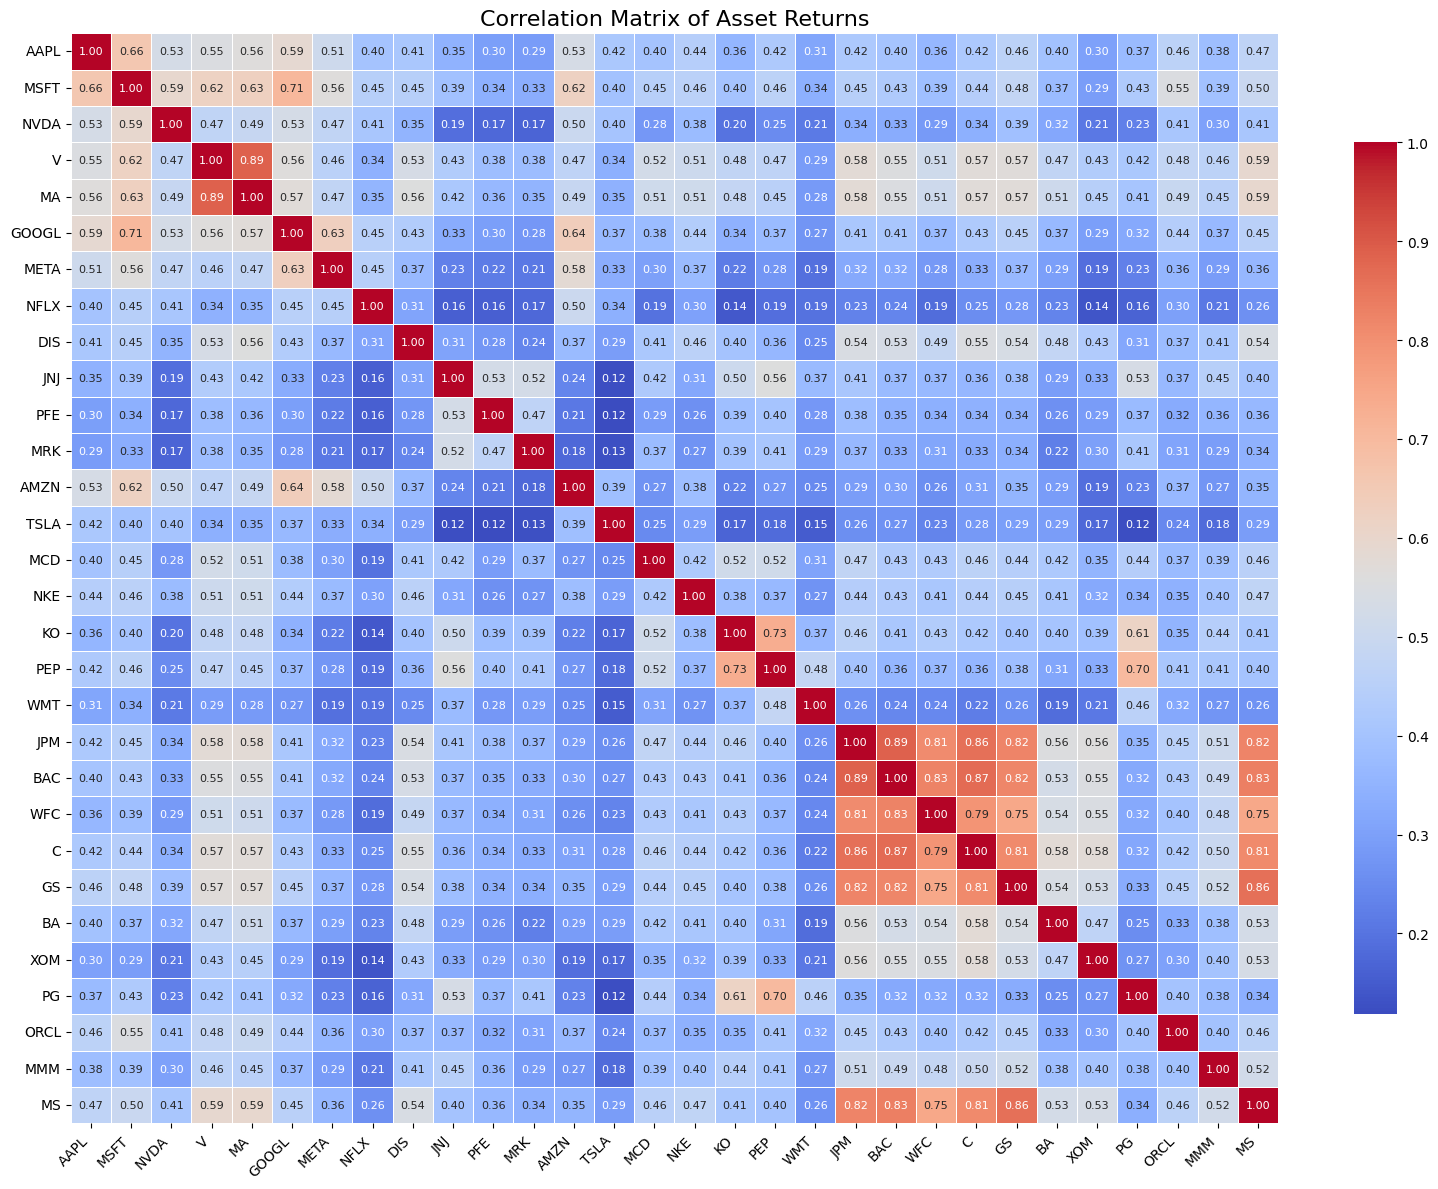

In [10]:
#Distribution of asset Betas
plt.figure(figsize=(10, 6))
sns.histplot(resultados_regressao['Beta'], kde=True)
plt.title('Distribution of Asset Betas')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot Alpha vs. Beta
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Beta', y='Alpha', data=resultados_regressao, hue='Ativo', palette='viridis')
plt.title('Alpha vs. Beta for Each Asset')
plt.xlabel('Beta')
plt.ylabel('Alpha')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at Alpha = 0
plt.grid(True)
plt.show()

# Calculate the correlation matrix for the asset returns
correlation_matrix = df[colunas_ativos].corr()

# Plot a heatmap of the correlation matrix with improved settings
plt.figure(figsize=(16, 12))  # Increase figure size for better readability
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    annot_kws={"size": 8},  # Adjust font size of the annotations
    linewidths=.5,  # Add lines between cells for clarity
    cbar_kws={"shrink": 0.8}  # Adjust the size of the color bar
)

# Improve label formatting
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=10)  # Keep y-axis labels horizontal

plt.title('Correlation Matrix of Asset Returns', fontsize=16)
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()